In [40]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
data=[]
with open("./KEY/final_meta_all_processed - no other.csv", "r+", encoding="utf-8") as fp:
    csv_reader=csv.DictReader(fp)
    for row in csv_reader:
        data.append(row)

data



[OrderedDict([('video_id', '0hVZOJCYBBM'),
              ('title', 'Important Youtube Announcement (please watch)'),
              ('video_length', '155'),
              ('publish_at', '2019-12-28T21:00:06.000Z'),
              ('category_id', '24'),
              ('category', 'Entertainment'),
              ('language', 'en'),
              ('live_content', 'none'),
              ('description',
               "I CAN'T BELIEVE WE REACHED OUR GOAL!!!!! YOU GUYS ARE AMAZING!\n\nNew Merch - https://shopmrbeast.com/\n\nSUBSCRIBE OR I TAKE YOUR DOG\n\n\n----------------------------------------------------------------\nfollow all of these or i will kick you\n• Twitter - https://twitter.com/MrBeastYT\n•  Instagram - https://www.instagram.com/mrbeast\n--------------------------------------------------------------------"),
              ('tags', ''),
              ('comment_count', '101342'),
              ('view_count', '18417626'),
              ('like_count', '1808082'),
              ('dis

In [41]:
# Function to find sample mean. 
def mean(arr, n) : 
  
    # loop to calculate  
    # sum of array elements. 
    sm = 0
    for i in range(0,n) : 
        sm = sm + arr[i] 
       
    return sm / n 
  
  
# Function to calculate sample 
# standard deviation. 
def SSD(arr, n) : 
    sm = 0
    for i in range(0,n) : 
        sm = sm + (arr[i] - mean(arr, n)) * (arr[i] - mean(arr, n)) 
   
    return (math.sqrt(sm / (n - 1))) 
   
   
# Function to calculate sample error. 
def sampleError(arr) : 
    n=len(arr)
    # Formula to find sample error. 
    return SSD(arr, n) / (math.sqrt(n)) 

['celebrity', 'professional', 'amateur']


C:\Users\shuon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\shuon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


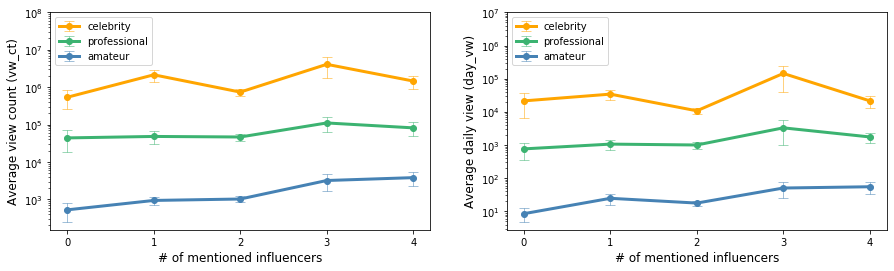

In [71]:
# the chart for view_count and day_vw

# id_list = [d['video_id'] for d in data]
# id_set = set(id_list)

def draw_line(data, data_key, tag, color, label):
    cel = [(float(d[data_key]),float(d['mention_count'])) 
        for d in data if d['status']== tag ]
    cel_value = []
    cel_mean_list = []
    cel_std_list = []
    for m in range(len(mention)):
        cel_value = [c[0] for c in cel if c[1] == float(mention[m])]
        cel_mean = np.mean(cel_value)
        cel_mean_list.append(cel_mean)
        cel_std = sampleError(cel_value)
        cel_std_list.append(cel_std)

    plt.errorbar(
        mention,     # X
        cel_mean_list,    # Y
        yerr=cel_std_list,        # Y-errors
        color=color,
        marker="o",
        linewidth=3,   # width of plot line
        elinewidth=0.5,# width of error bar line
        ecolor=color,    # color of error bar
        capsize=5,     # cap length for error bar
        capthick=0.5,   # cap thickness for error bar
        label = label
        )


colors1 = ["orange", "mediumseagreen", "steelblue"] # three groups
mention = [0,1,2,3,4]
tag = ["celebrity", "professional", "amateur"]
print(tag)
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
draw_line(data,"vw_ct", tag[0], colors1[0], "celebrity")
draw_line(data,"vw_ct", tag[1], colors1[1], "professional")
draw_line(data,"vw_ct", tag[2], colors1[2], "amateur")
plt.legend(loc = 'upper left')
# plt.title('total views of different types of videos by different mention times')
plt.yscale('log')
plt.xlabel('# of mentioned influencers', fontsize=12)
plt.ylabel('Average view count (vw_ct)', fontsize=12)
plt.ylim(0, 100000000)
plt.xticks(range(5))

plt.subplot(1,2,2)
draw_line(data,"day_vw", tag[0], colors1[0], "celebrity")
draw_line(data,"day_vw", tag[1], colors1[1], "professional")
draw_line(data,"day_vw", tag[2], colors1[2], "amateur")

plt.legend(loc = 'upper left')
# plt.title('daily views of different types of videos by different mention times')
plt.yscale('log')
plt.xlabel('# of mentioned influencers', fontsize=12)
plt.ylabel('Average daily view (day_vw)', fontsize=12)
plt.xticks(range(5))
plt.ylim(0, 10000000)
plt.show()